#### About
Fitness data analysis involves looking at information about your physical activities and health to understand how your body is performing. This information might come from things like fitness apps, wearables like smartwatches, or records you keep yourself.

The dataset consists of fitness-related metrics collected through a fitness watch over multiple days. Each record in the dataset includes the following attributes:

Date: The date when the data was recorded.

Time: The time at which the data was recorded.

Step Count: The number of steps taken during the recorded interval.

Distance: The distance covered in meters during the recorded interval.

Energy Burned: The amount of energy burned in kilocalories during the recorded interval.

Flights Climbed: The number of flights of stairs climbed during the recorded interval.

Walking Double Support Percentage: The percentage of time both feet are in contact with the ground while walking.

Walking Speed: The walking speed in meters per second during the recorded interval.

#### Problem Statement

Perform exploratory data analysis (EDA) to gain insights into the distribution, trends, and patterns of each fitness metric.

Create visualizations to depict how different metrics vary over time, across different time intervals, or in relation to one another.

Analyze how step count, distance, energy burned, and other metrics correlate with each other.

Identify potential patterns in walking efficiency, energy expenditure, and the relationship between step count and walking speed.

Segment the data into time intervals (e.g., morning, afternoon, evening) based on the recorded timestamps.

Investigate variations in fitness metrics (e.g., step count, walking speed) during different time intervals.

--Sachin Bajaj

In [27]:
import numpy as np
import pandas as pd
import plotly.io as pio
import seaborn as sns
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import plotly.express as px

data = pd.read_csv("Apple-Fitness-Data.csv")
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [3]:
#Let’s have a look if this data contains any null values or not:
data.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

So, the data doesn’t have any null values. Let’s move further by analyzing my step count over time:

In [16]:
# Step Count Over Time
fig1 = px.line(data, x="Time",
               y="Step Count",
               title="Step Count Over Time")
fig1.show()

Now, let’s have a look at the distance covered over time:

In [5]:
# Distance Covered Over Time
fig2 = px.line(data, x="Time",
               y="Distance",
               title="Distance Covered Over Time")
fig2.show()

Now, let’s have a look at my energy burned over time:

In [6]:
# Energy Burned Over Time
fig3 = px.line(data, x="Time",
               y="Energy Burned",
               title="Energy Burned Over Time")
fig3.show()

Now, let’s have a look at my walking speed over time:

In [7]:
# Walking Speed Over Time
fig4 = px.line(data, x="Time",
               y="Walking Speed",
               title="Walking Speed Over Time")
fig4.show()

Now, let’s calculate and look at the average step counts per day:

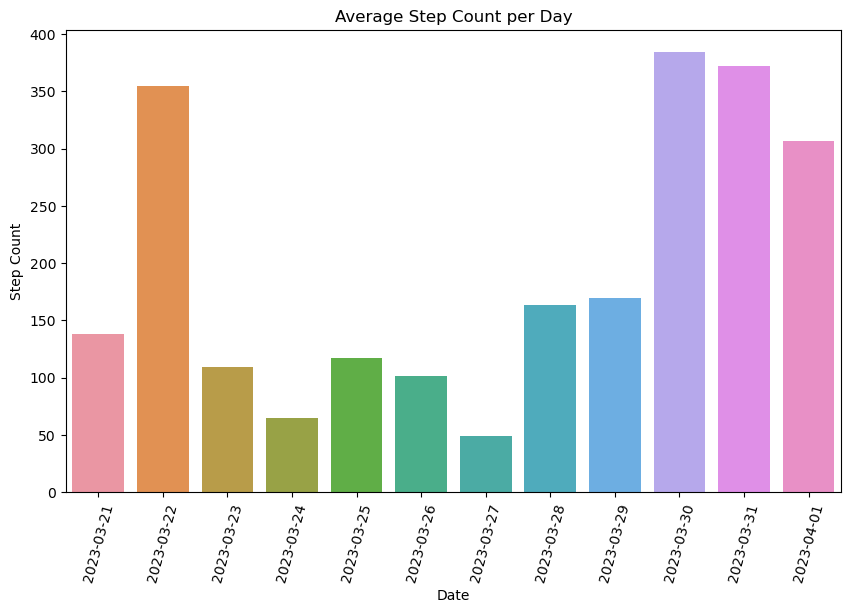

In [26]:
# Calculate average step count per day
average_step_count_per_day = data.groupby("Date")["Step Count"].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Date", y="Step Count", data=average_step_count_per_day)
plt.title("Average Step Count per Day")
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.xticks(rotation=75)
plt.show()

Now, let’s have a look at my walking efficiency over time:

In [9]:
# Calculate Walking Efficiency
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

fig6 = px.line(data, x="Time",
               y="Walking Efficiency",
               title="Walking Efficiency Over Time")
fig6.show()

Now, let’s have a look at the step count and walking speed variations by time intervals:

In [23]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(data, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show()

Now, let’s compare the daily average of all the health and fitness metrics:

In [25]:
# Reshape data for treemap
daily_avg_metrics = data.groupby("Date").mean().reset_index()

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], 
                                                  value_vars=["Step Count", "Distance", 
                                                              "Energy Burned", "Flights Climbed", 
                                                              "Walking Double Support Percentage", 
                                                              "Walking Speed"])

# Treemap of Daily Averages for Different Metrics Over Several Weeks
fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics")
fig.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_22108\1021872881.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In the visualization, each health and fitness metric is represented as a rectangular tile. The size of each tile reflects the value of the corresponding metric, while the color of the tiles indicates the specific metric being represented. When interacting with the visualization, hovering over the tiles displays the precise average value for each metric.

However, the dominance of the Step Count metric in the visualization poses a challenge in effectively visualizing variations in other metrics. This is primarily due to the generally higher numerical values associated with Step Count compared to other metrics. To address this issue and gain clearer insights into the variations of other metrics, we can visualize the data again, this time excluding Step Count from the visualization.

In [12]:
# Select metrics excluding Step Count
metrics_to_visualize = ["Distance", "Energy Burned", "Flights Climbed", 
                        "Walking Double Support Percentage", "Walking Speed"]

# Reshape data for treemap
daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], value_vars=metrics_to_visualize)

fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics (Excluding Step Count)")
fig.show()

**So, this is how you can analyze and work with fitness data using Python.**

### Summary
Analyzing fitness data with Python is essential for businesses operating in the health and wellness sector. By delving into user data collected from fitness wearables, companies gain valuable insights into user behavior, enabling them to tailor personalized solutions and actively contribute to enhancing users' health and well-being. This data-driven approach not only fosters a deeper understanding of user preferences and habits but also empowers businesses to deliver more effective and targeted services, ultimately fostering healthier lifestyles and happier customers.